<a href="https://colab.research.google.com/github/Akshayus29/Assignments/blob/main/preprocessing_case_study_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [ ]:
house_pricing = pd.read_csv('/content/House_Pricing.csv')
house_pricing

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [ ]:
house_pricing.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#Checking duplicates
house_pricing.duplicated().sum()

np.int64(0)

### **Handling missing values**

In [ ]:
#finding missing values
house_pricing.isna().sum()


,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [ ]:
cols_t_fix = [
    'Sale Price',
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)'
]


for col in cols_t_fix:
    median_value = house_pricing[col].median()
    house_pricing[col] = house_pricing[col].fillna(median_value)



In [ ]:
house_pricing.isna().sum()


,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [ ]:
cols_to_drop = [
    'No of Times Visited',
    'Zipcode',
    'Latitude',
    'Longitude',
    'Living Area after Renovation (in Sqft)'
]

for col in cols_to_drop:
    if col in house_pricing.columns:
        house_pricing.drop(col, axis=1, inplace=True)



In [ ]:
house_pricing.isna().sum()


,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0


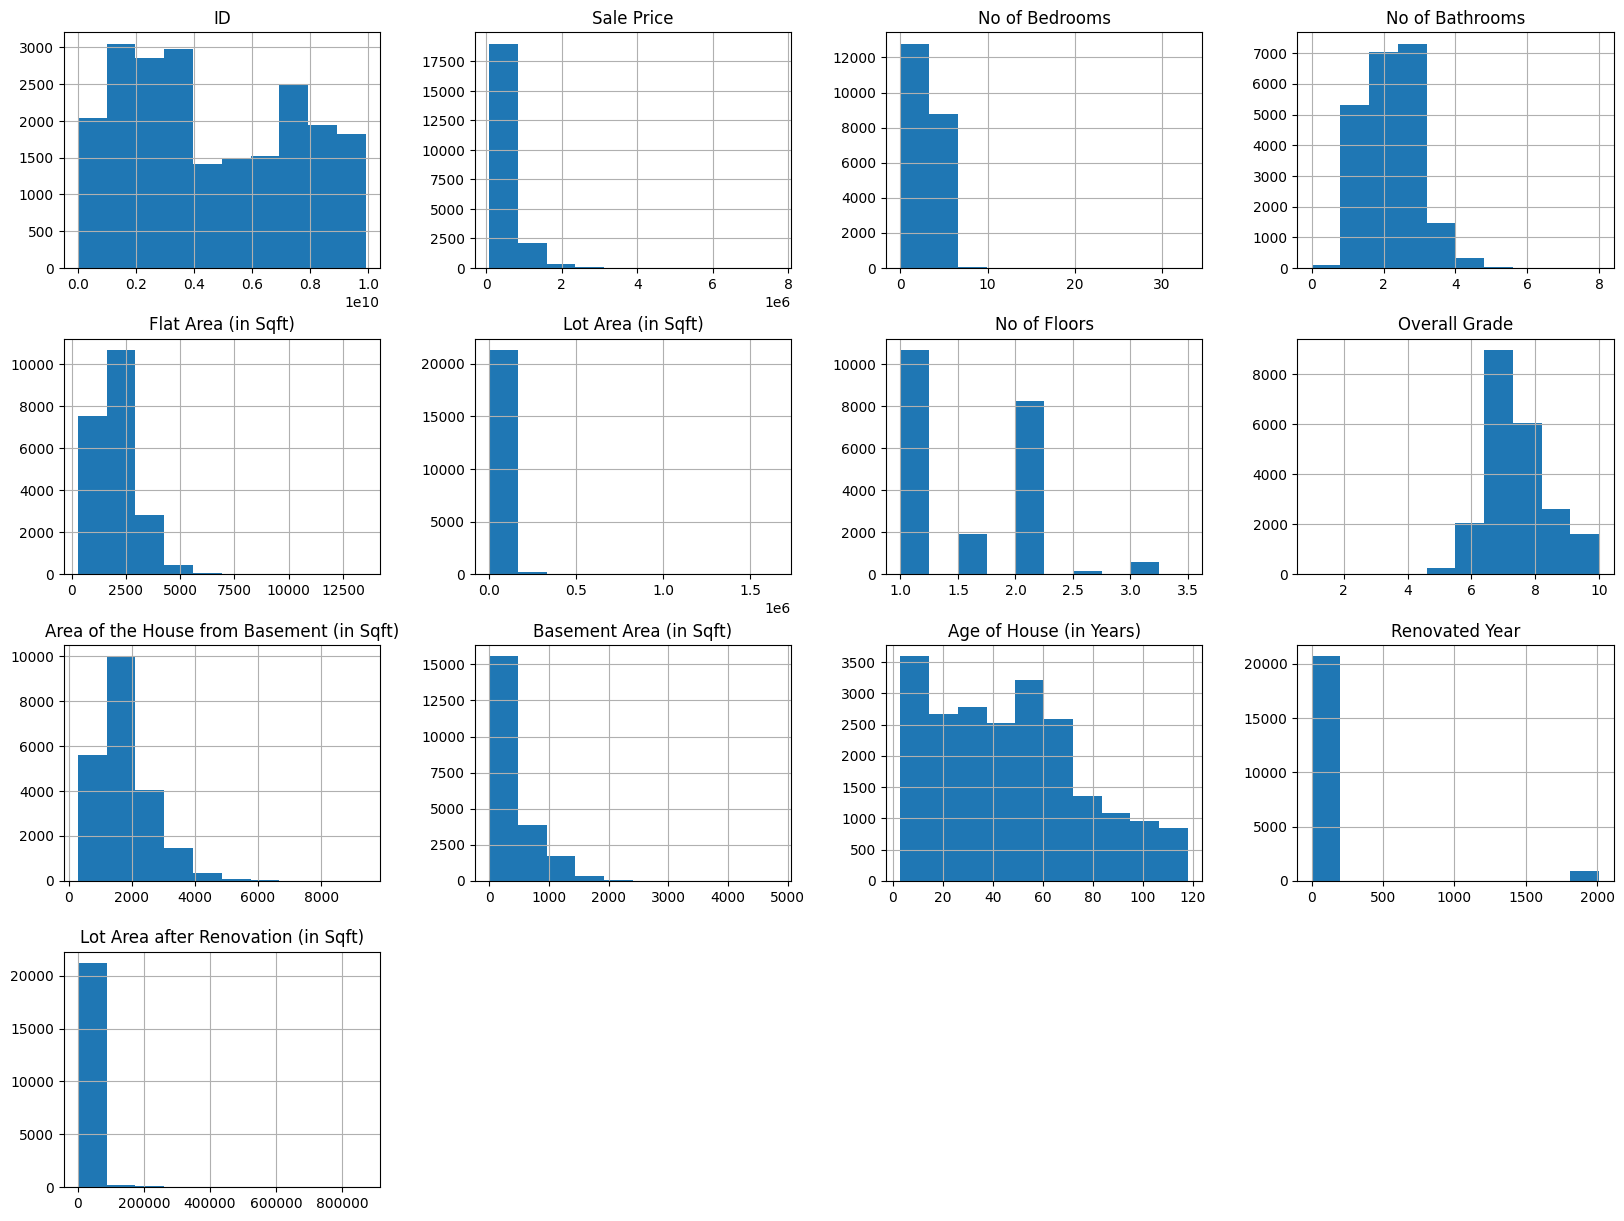

In [ ]:
house_pricing.hist(figsize = (20, 15))
plt.show()

### **Finding Outlier**

In [ ]:
house_pricing1 = house_pricing.copy()   # your cleaned dataset

num_cols = house_pricing1.select_dtypes(include=['int64', 'float64']).columns

outlier_info = {}

for col in num_cols:
    Q1 = house_pricing1[col].quantile(0.25)
    Q3 = house_pricing1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # boolean Series: True where value is outlier
    outliers_col = (house_pricing1[col] < lower) | (house_pricing1[col] > upper)

    outlier_info[col] = outliers_col.sum()  # how many outliers in this column

outlier_info


{'ID': np.int64(0),
 'Sale Price': np.int64(1159),
 'No of Bedrooms': np.int64(546),
 'No of Bathrooms': np.int64(571),
 'Flat Area (in Sqft)': np.int64(572),
 'Lot Area (in Sqft)': np.int64(2423),
 'No of Floors': np.int64(0),
 'Overall Grade': np.int64(1911),
 'Area of the House from Basement (in Sqft)': np.int64(610),
 'Basement Area (in Sqft)': np.int64(496),
 'Age of House (in Years)': np.int64(0),
 'Renovated Year': np.int64(914),
 'Lot Area after Renovation (in Sqft)': np.int64(2194)}

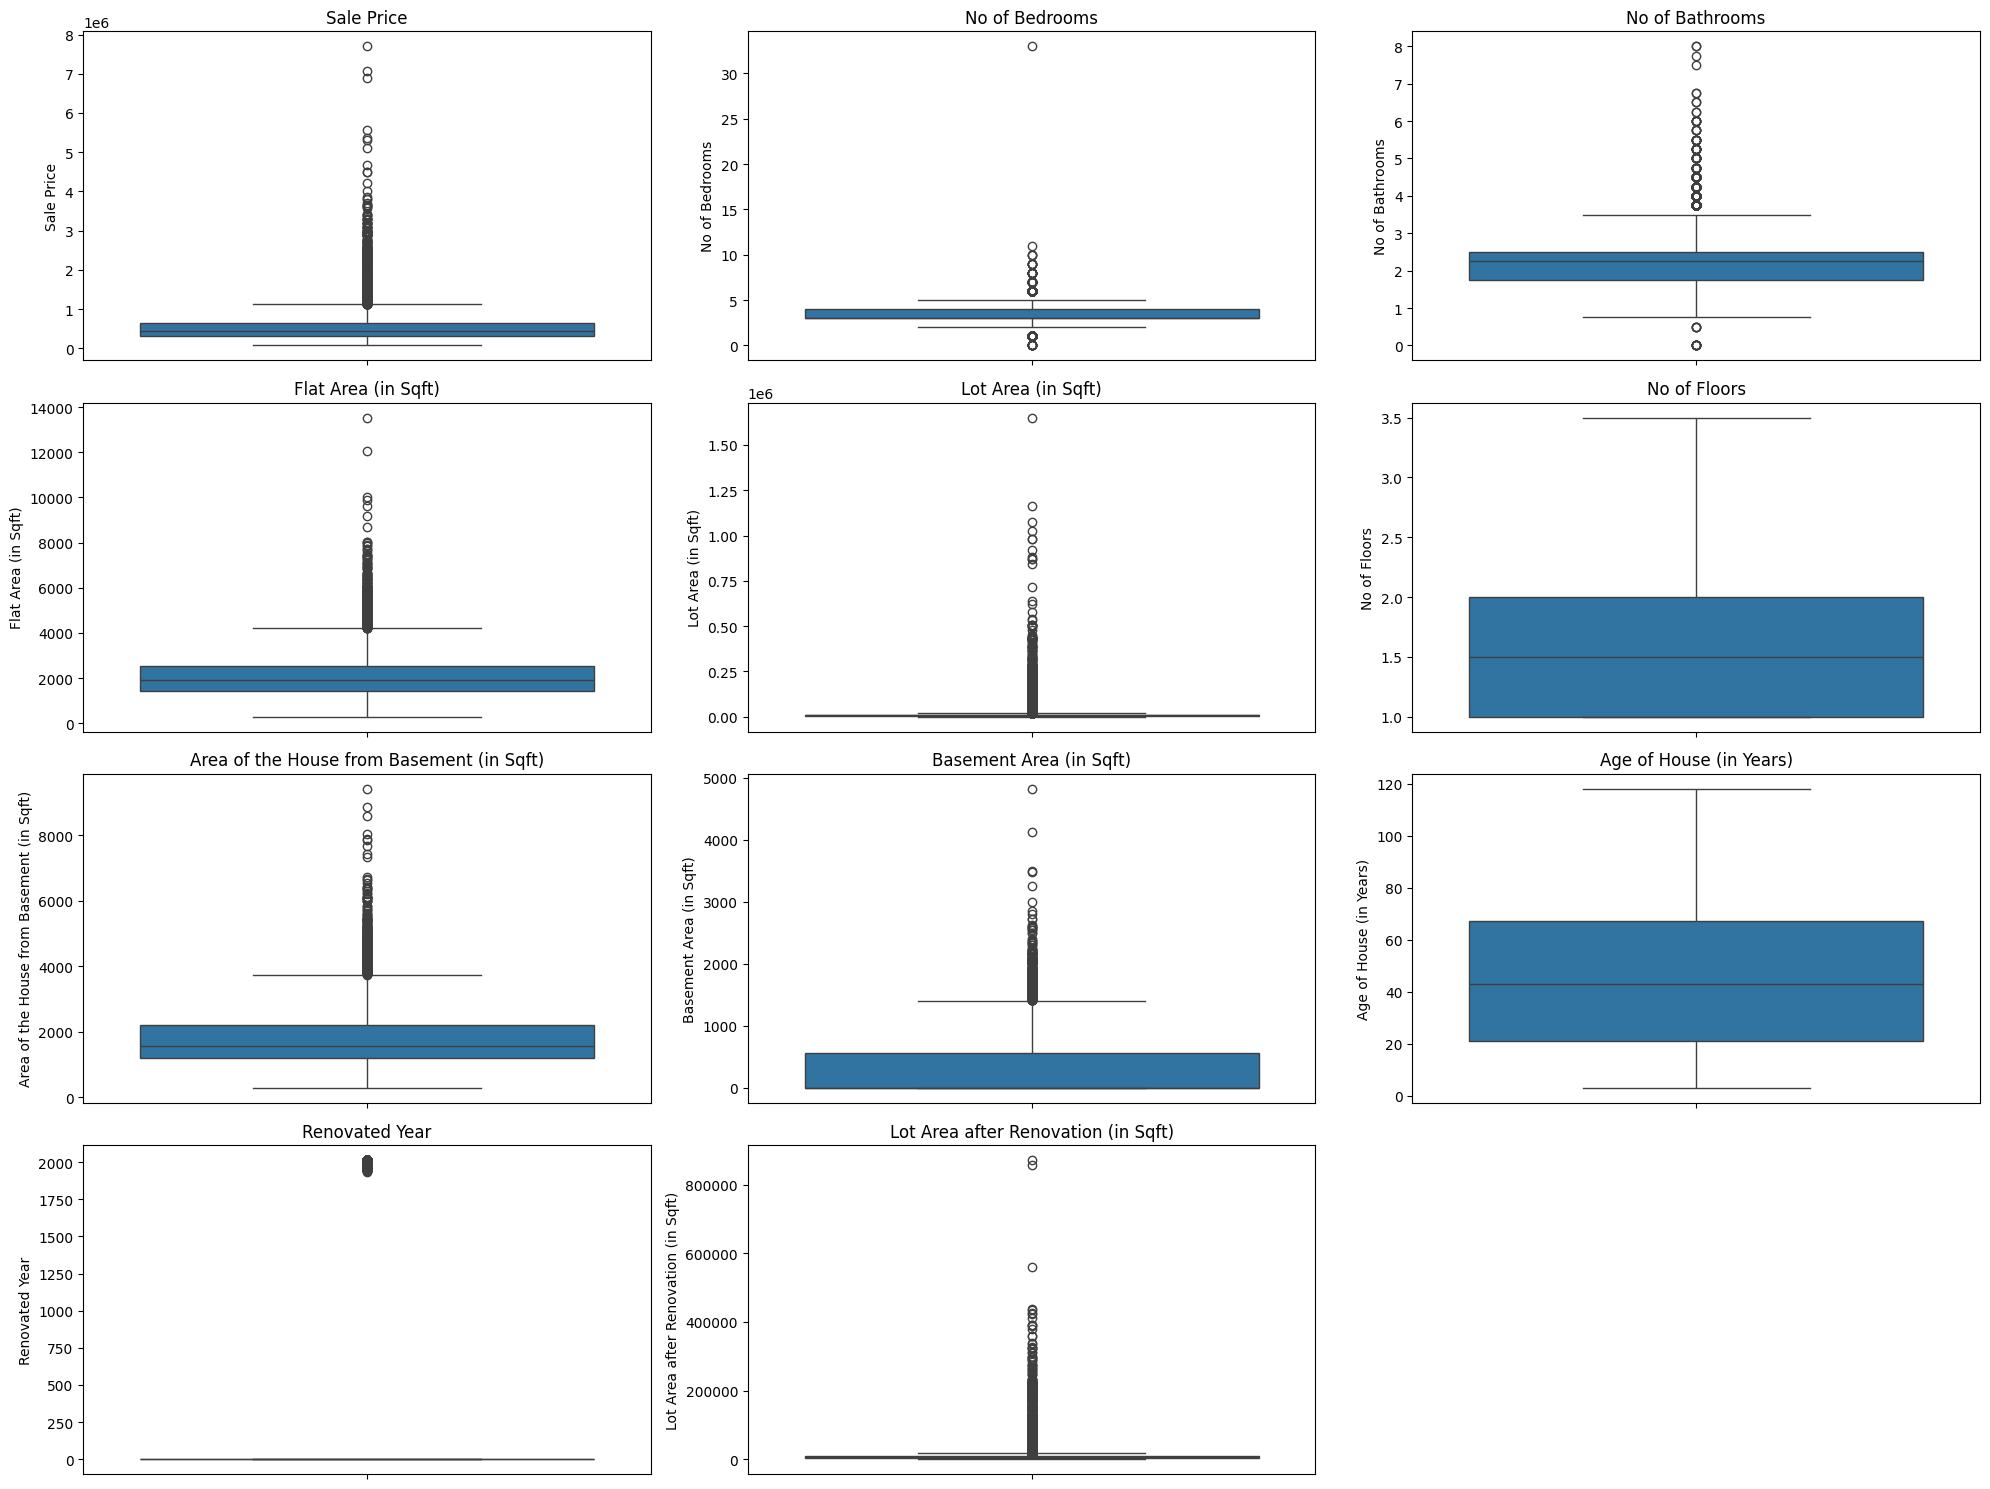

In [ ]:
numerical_cols = [
    'Sale Price',
    'No of Bedrooms',
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'No of Floors',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Age of House (in Years)',
    'Renovated Year',
    'Lot Area after Renovation (in Sqft)'
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=house_pricing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### **Outlier Removal using IQR**

In [ ]:
for col in numerical_cols:
    Q1 = house_pricing[col].quantile(0.25)
    Q3 = house_pricing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    house_pricing = house_pricing[(house_pricing[col] >= lower_bound) & (house_pricing[col] <= upper_bound)]

print(f"Shape of DataFrame after outlier removal: {house_pricing.shape}")

Shape of DataFrame after outlier removal: (15844, 16)


In [ ]:
# Copy dataset
house_pricing1 = house_pricing.copy()

# Select numerical columns
num_cols = house_pricing1.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to store outlier count
outlier_info = {}

for col in num_cols:
    Q1 = house_pricing1[col].quantile(0.25)
    Q3 = house_pricing1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Outlier condition
    outliers = (house_pricing1[col] < lower) | (house_pricing1[col] > upper)

    # Count outliers
    outlier_info[col] = outliers.sum()

# Print result clearly
for col, count in outlier_info.items():
    if count > 0:
        print(f"{col} : {count}")
    else:
        print(f"{col}")


ID
Sale Price : 254
No of Bedrooms
No of Bathrooms
Flat Area (in Sqft) : 70
Lot Area (in Sqft) : 223
No of Floors
Overall Grade : 415
Area of the House from Basement (in Sqft) : 196
Basement Area (in Sqft) : 113
Age of House (in Years)
Renovated Year
Lot Area after Renovation (in Sqft) : 61


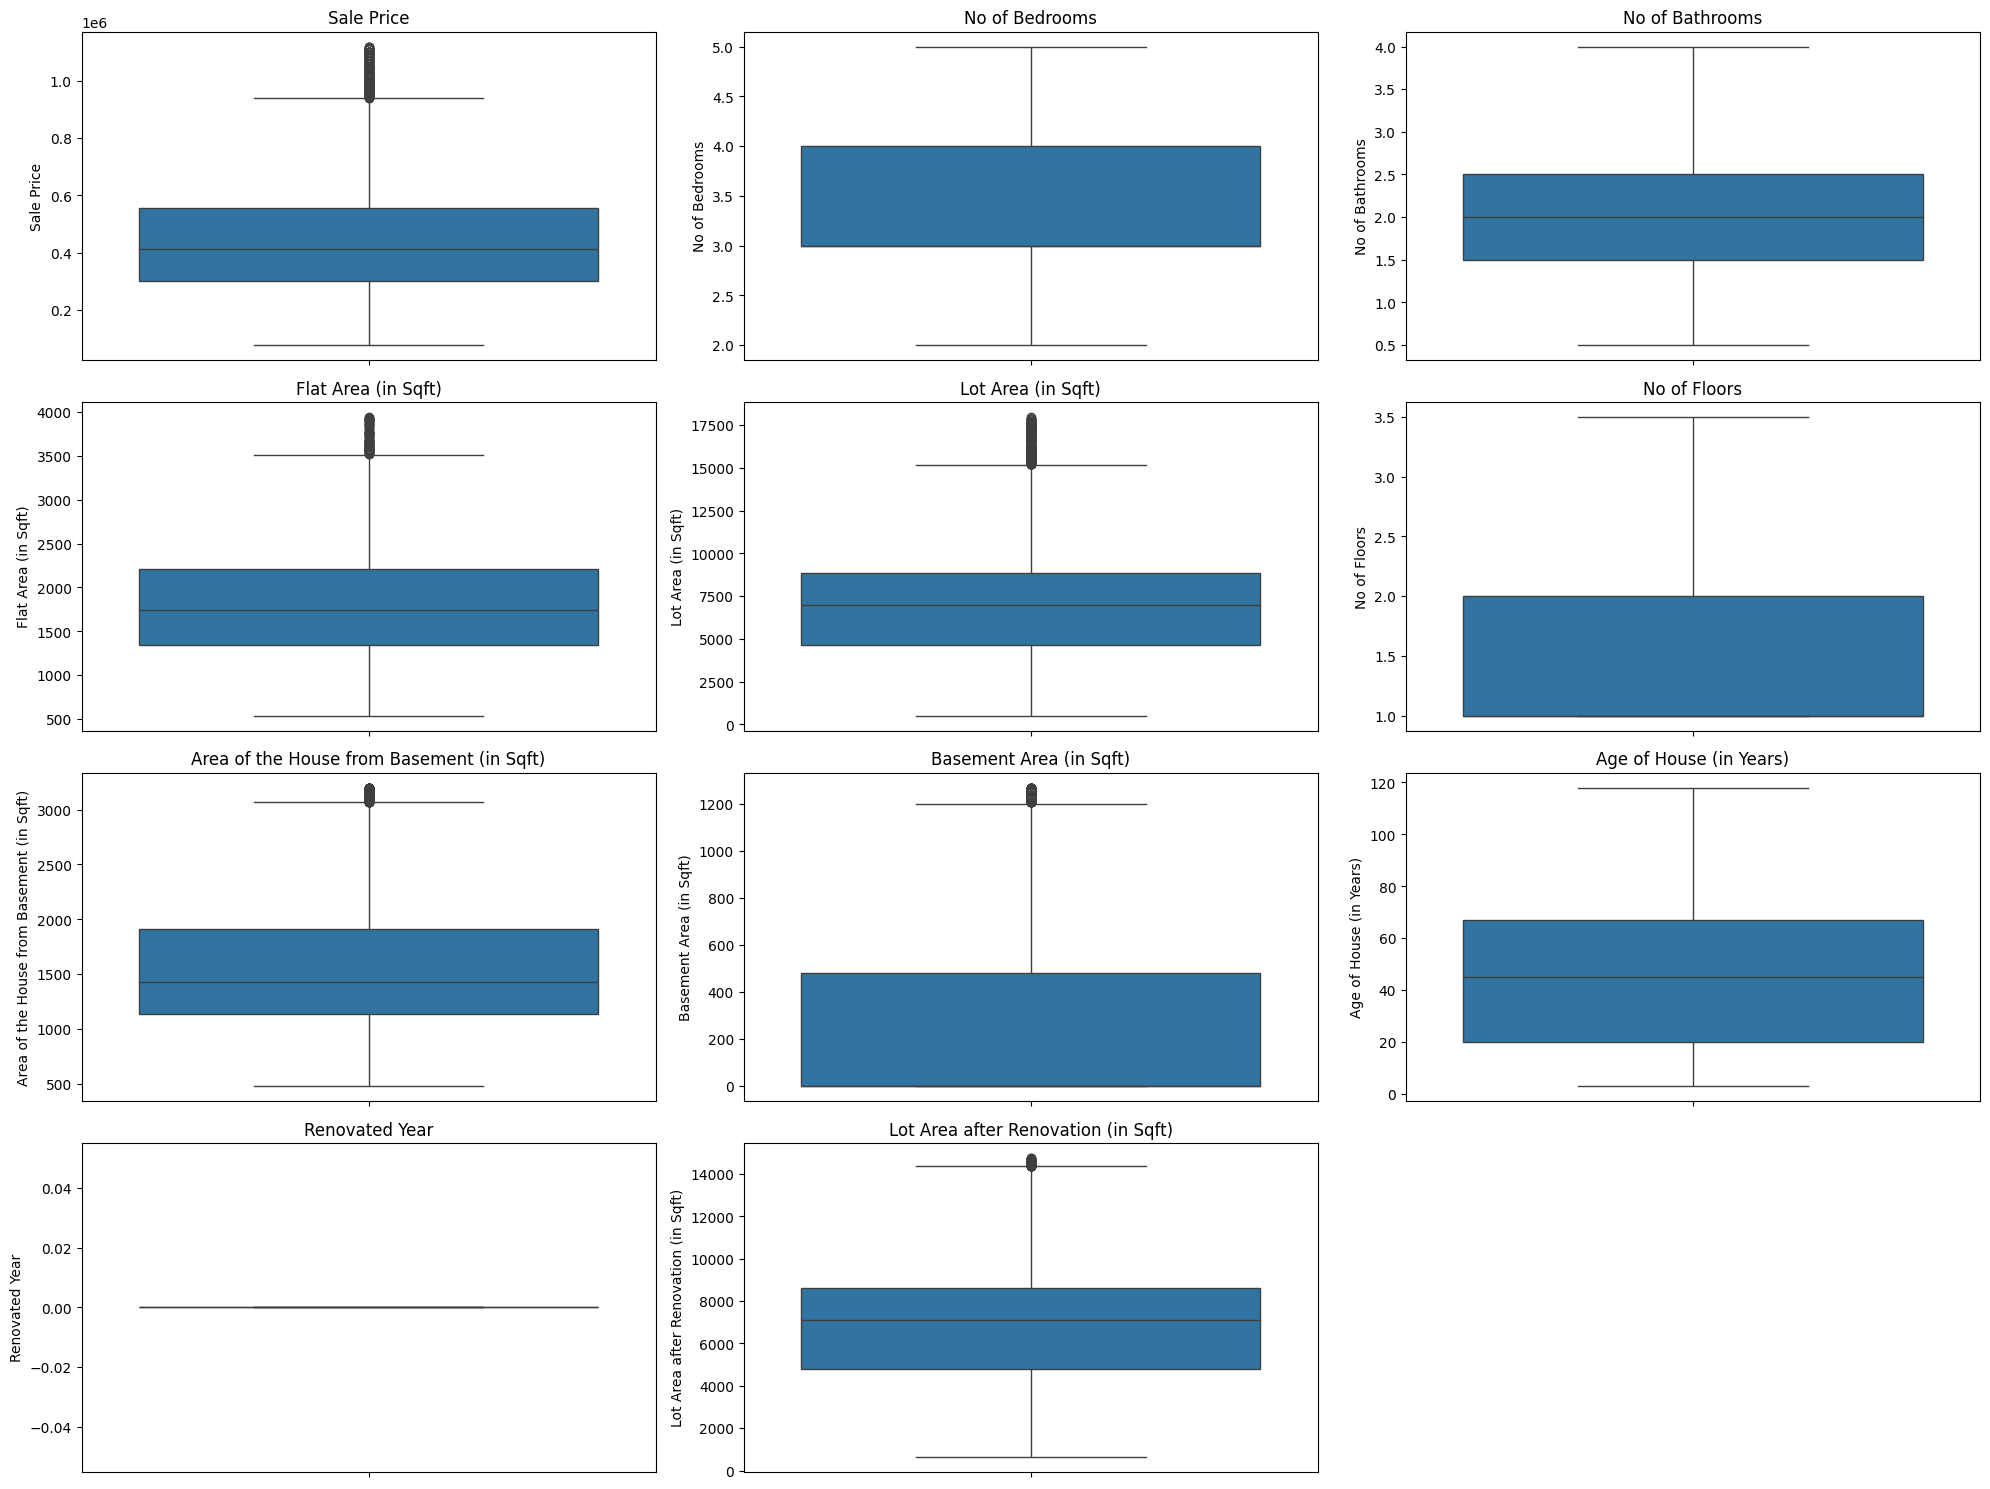

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=house_pricing1[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### **Scailing**

In [ ]:
numerical_cols = house_pricing1.select_dtypes(include=['int64', 'float64']).columns
columns_to_scale = [col for col in numerical_cols if col not in ['Sale Price', 'ID']]

print("Columns to be scaled:")
print(columns_to_scale)

Columns to be scaled:
['No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Lot Area after Renovation (in Sqft)']


## Apply Standard Scaling



In [ ]:
scaler = StandardScaler()
house_pricing1[columns_to_scale] = scaler.fit_transform(house_pricing1[columns_to_scale])
house_pricing.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,5650
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,7503
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,Fair,7,1715.0,0,23,0,6819


### **Encoding**

In [ ]:
house_pricing1.dtypes

,0
ID,int64
Date House was Sold,object
Sale Price,float64
No of Bedrooms,float64
No of Bathrooms,float64
Flat Area (in Sqft),float64
Lot Area (in Sqft),float64
No of Floors,float64
Waterfront View,object
Condition of the House,object


In [ ]:
house_pricing1 = pd.get_dummies(house_pricing1, columns=['Date House was Sold','Waterfront View', 'Condition of the House'], drop_first=True)
house_pricing1.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,-0.318195,-1.478223,-1.037032,-0.390589,-0.856454,-0.443280,-0.675545,-0.671520,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,180000.0,-1.616208,-1.478223,-1.714365,0.963654,-0.856454,-1.566655,-1.382176,-0.671520,...,False,True,False,False,False,False,False,True,False,False
3,2487200875,604000.0,0.979818,1.556465,0.251553,-0.592947,-0.856454,-0.443280,-0.899599,1.920249,...,False,False,False,False,False,False,True,False,False,False
4,1954400510,510000.0,-0.318195,0.039121,-0.211016,0.365919,-0.856454,0.680094,0.186200,-0.671520,...,False,True,False,False,False,False,False,True,False,False
6,1321400060,257500.0,-0.318195,0.418457,-0.153195,-0.026655,0.967793,-0.443280,0.246523,-0.671520,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
house_pricing1.dtypes

,0
ID,int64
Sale Price,float64
No of Bedrooms,float64
No of Bathrooms,float64
Flat Area (in Sqft),float64
Lot Area (in Sqft),float64
No of Floors,float64
Overall Grade,float64
Area of the House from Basement (in Sqft),float64
Basement Area (in Sqft),float64


### **Train Test split**

In [ ]:
X = house_pricing1.drop('Sale Price', axis=1)
y = house_pricing1['Sale Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12675, 29)
X_test shape: (3169, 29)
y_train shape: (12675,)
y_test shape: (3169,)
